In [64]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [65]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [66]:
wine = load_wine()

In [67]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [68]:
# загружаем данные в датафрейм
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data_class = wine.target

In [69]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [70]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [71]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [72]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [73]:
lda = LinearDiscriminantAnalysis()

In [74]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [75]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 0,
       1, 1, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2,
       0])

In [76]:
# смотрим разницу факта(y_test) и прогноза (y predict)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [77]:
result

,0,1
0,1,1
1,1,1
2,0,0
3,1,1
4,2,2
5,1,1
6,0,0
7,0,0
8,0,0
9,1,1


In [78]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test, lda.predict(X_test))

0.9777777777777777

In [80]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 2.34943805e+00,  1.88713661e-01,  5.13676191e+00,
        -8.00246804e-01, -3.38008911e-02, -1.43951887e+00,
         4.09789905e+00,  5.59780682e-01, -4.50709495e-01,
        -7.61488081e-01,  2.00162250e+00,  4.88598401e+00,
         1.52410024e-02],
       [-1.55691147e+00, -8.58999560e-01, -6.72969386e+00,
         3.62890850e-01,  3.44555978e-03,  5.50967100e-01,
         2.36927434e+00,  5.78052253e+00,  6.65574980e-01,
        -8.40951355e-01,  6.23543106e+00,  2.16400458e-01,
        -8.06453493e-03],
       [-3.17515259e-01,  9.05351968e-01,  3.52374644e+00,
         3.20476779e-01,  2.86065009e-02,  7.05621113e-01,
        -7.00288360e+00, -7.87752192e+00, -4.04427297e-01,
         1.80948765e+00, -9.86115402e+00, -5.04127279e+00,
        -4.64108002e-03]])

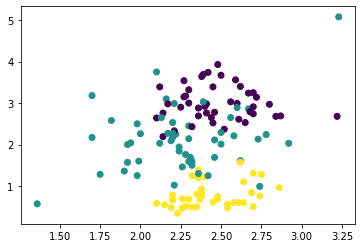

In [22]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['ash'], X_train['flavanoids'], c=y_train)
plt.show()

In [23]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['ash', 'flavanoids']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['ash', 'flavanoids']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

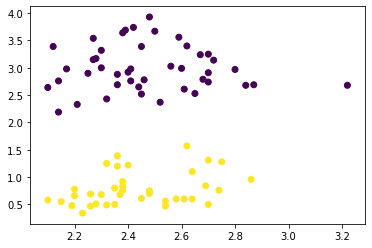

In [24]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
plt.show()

In [25]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [26]:
# посмотрим на наши центроиды
lda_small.means_

array([[2.47340909, 2.99136364],
       [2.43675676, 0.78351351]])

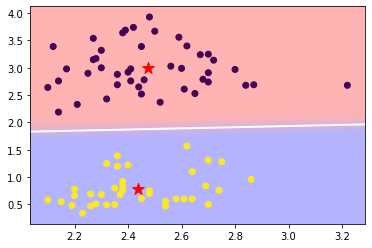

In [27]:
# сам scatter plot
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='flat')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [29]:
# второй признак в 16 раз важнее первого для кластеризации (это видно по визуализации)
lda_small.coef_

array([[  1.71278841, -16.10782692]])

In [30]:
# какая будет точность?
accuracy_score(sy_test, lda_small.predict(small_test))

1.0

In [31]:
# заменим модель на логистическую регресиию
# кому интересно, отличия логистической регресссии от LDA: 
# https://www.introspective-mode.org/logistic-regression-or-discriminant-function-analysis/
# Основные моменты:
# LR может работать с категориальными признаками 
# зависимая пееременная в LR подчиняется логистической функции (изменяется от 0 до 1) и непрерывна
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(small_train, sy_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
lr.predict(small_test)

array([0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 0])

In [35]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [36]:
lr.coef_

array([[ 0.09395612, -3.12873601]])

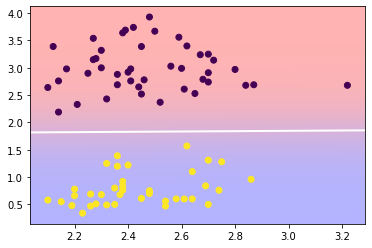

In [37]:
plt.scatter(small_train['ash'], small_train['flavanoids'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

## Кластеризация

In [38]:
# генерируем искусвтенные данные для примера
from sklearn.datasets import make_moons, make_blobs

In [39]:
# 200 точек с 2 центрами, СКО - 2.5
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2.5)

In [40]:
X

array([[11.20082192,  9.22864523],
       [ 6.0695092 ,  5.91982992],
       [ 5.70888963,  0.76488917],
       [ 8.06907593,  6.81339098],
       [ 6.67131201, -0.90529583],
       [ 5.14209598, -1.33885821],
       [ 5.28990054,  1.32101675],
       [ 6.59026975,  6.99823685],
       [ 5.82750639, -2.87343803],
       [ 6.76721146, -3.76431256],
       [ 2.02189646, -4.03118177],
       [ 8.12347507, 10.79372425],
       [ 4.66225274,  6.85257582],
       [ 2.30327774,  5.60292031],
       [ 8.12502013,  7.51872753],
       [ 6.30846374,  7.98334394],
       [ 5.21789311, -6.74894053],
       [ 6.10773756,  3.18714499],
       [ 8.02772826, 11.47798881],
       [ 5.35122249,  7.32479349],
       [ 1.79361929, -3.83539415],
       [ 7.62681585,  8.14916627],
       [ 5.84088055,  4.95070833],
       [ 3.36001307, -1.21172624],
       [ 9.69918728,  6.30490124],
       [10.00052787,  4.86813886],
       [ 8.9788008 ,  1.39836299],
       [ 6.10171978, -1.7025969 ],
       [ 9.45689461,

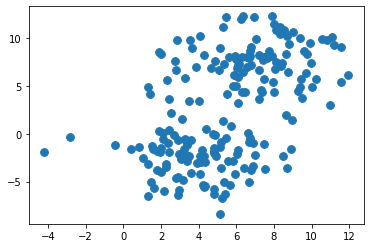

In [41]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [42]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

В реальных задачах при разделении выборки на train и test нужно обучать StandardScaler только на тренировочных данных (и применять уже к тестовым данным).


In [44]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

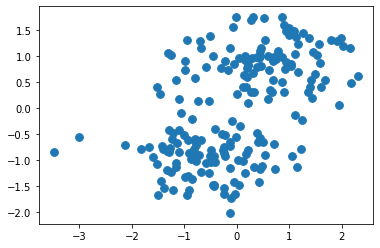

In [45]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [46]:
from sklearn.cluster import KMeans

In [51]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=4)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 3, 0, 1, 0, 0, 0, 3, 0, 0, 2, 1, 3, 3, 1, 3, 0, 3, 1, 3, 2, 1,
       3, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 3, 1, 0, 1, 2, 1, 3, 0,
       2, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 0, 3, 0, 1, 2, 2, 2, 2, 3, 2, 3,
       1, 0, 0, 2, 1, 1, 0, 3, 2, 0, 3, 0, 0, 1, 0, 3, 2, 2, 0, 3, 2, 1,
       1, 3, 2, 1, 0, 2, 0, 1, 3, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 3, 1, 1, 0, 1, 3, 3, 1, 3, 3, 1,
       1, 1, 1, 0, 0, 0, 2, 3, 2, 0, 2, 3, 1, 2, 3, 0, 3, 3, 3, 2, 0, 3,
       3, 3, 2, 2, 3, 2, 2, 3, 1, 2, 3, 2, 3, 1, 2, 2, 3, 3, 0, 3, 0, 2,
       3, 1, 1, 2, 1, 0, 1, 1, 3, 2, 2, 2, 0, 1, 3, 2, 3, 0, 2, 3, 3, 0,
       1, 0])

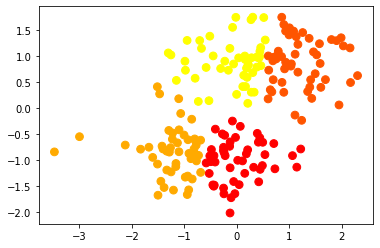

In [52]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [53]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

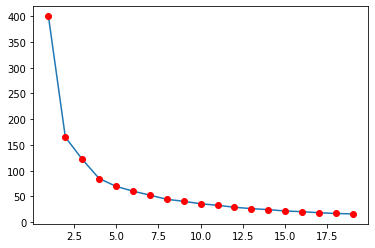

In [54]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Иерархическая кластеризация

In [55]:
from scipy.spatial.distance import pdist # новая библиотека scipy
from scipy.cluster import hierarchy

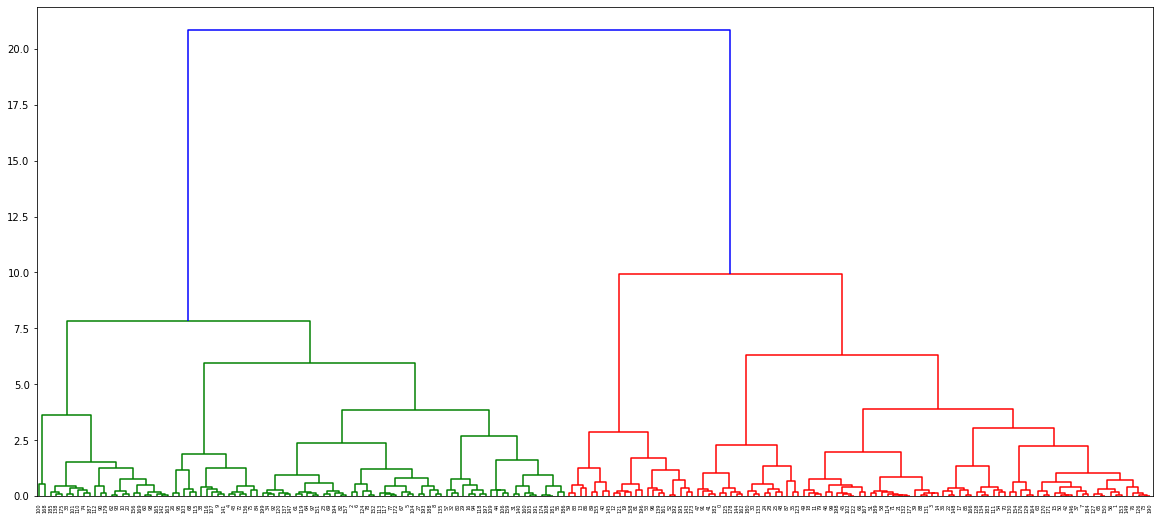

In [58]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [59]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [62]:
aglo = AgglomerativeClustering(n_clusters=4)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 3, 0, 2, 2, 0, 0, 1, 0, 0, 2, 3, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 3, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 3, 1, 3, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 3, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0,
       0, 2, 3, 0, 1, 3, 1, 1, 2, 1, 3, 0, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1,
       3, 0, 3, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 3, 2, 1, 1, 3, 2, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 2, 3, 1, 2, 1, 1, 2, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 1, 2, 1, 3,
       0, 0, 0, 3, 0, 1, 0, 0, 0, 3, 1, 3, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1,
       0, 1], dtype=int64)

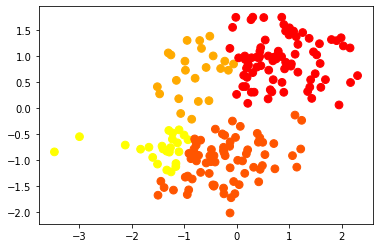

In [63]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)